importing packages

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

 path set

In [2]:
os.getcwd()

'C:\\Users\\cgupta'

In [3]:
os.chdir(r'C:\Users\cgupta\Desktop\work')

In [4]:
os.getcwd()

'C:\\Users\\cgupta\\Desktop\\work'

 fetching the data from excel

In [5]:
retail=pd.read_excel('Online Retail.xlsx','Online Retail', index_col=None, na_values=['NA'])

In [41]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [72]:
retail_new=retail[retail['Description'].notnull()]

In [78]:
retail_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      540455 non-null object
StockCode      540455 non-null object
Description    540455 non-null object
Quantity       540455 non-null int64
InvoiceDate    540455 non-null datetime64[ns]
UnitPrice      540455 non-null float64
CustomerID     406829 non-null float64
Country        540455 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [74]:
retail_new['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
5                SET 7 BABUSHKA NESTING BOXES
6           GLASS STAR FROSTED T-LIGHT HOLDER
7                      HAND WARMER UNION JACK
8                   HAND WARMER RED POLKA DOT
9               ASSORTED COLOUR BIRD ORNAMENT
10                 POPPY'S PLAYHOUSE BEDROOM 
11                  POPPY'S PLAYHOUSE KITCHEN
12          FELTCRAFT PRINCESS CHARLOTTE DOLL
13                    IVORY KNITTED MUG COSY 
14         BOX OF 6 ASSORTED COLOUR TEASPOONS
15              BOX OF VINTAGE JIGSAW BLOCKS 
16             BOX OF VINTAGE ALPHABET BLOCKS
17                   HOME BUILDING BLOCK WORD
18                   LOVE BUILDING BLOCK WORD
19                RECIPE BOX WITH METAL HEART
20                        DOORMAT NEW ENGLAND
21                   JAM MAKING SE

sorting the data in descending order of quantity

In [44]:
retail_sorted=retail.sort_values(by='Quantity', ascending=False)

/* finding out the negative quantity data */

In [45]:
retail_sorted.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


/* keeping only the positive good data in sorted descending form on the basis of quantity */

In [46]:
retail_sorted[0:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom


In [47]:
retail_sorted_nonegative=retail_sorted[retail_sorted['Quantity']>0]

In [48]:
retail_sorted_nonegative.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
147925,549155,22245,"HOOK, 1 HANGER ,MAGIC GARDEN",1,2011-04-06 17:08:00,1.63,NaN,United Kingdom
147906,549155,21755,LOVE BUILDING BLOCK WORD,1,2011-04-06 17:08:00,11.63,NaN,United Kingdom
147905,549155,21754,HOME BUILDING BLOCK WORD,1,2011-04-06 17:08:00,11.63,NaN,United Kingdom
147701,549128,22829,SWEETHEART WIRE WALL TIDY,1,2011-04-06 14:25:00,9.95,16713.0,United Kingdom
147903,549155,21621,VINTAGE UNION JACK BUNTING,1,2011-04-06 17:08:00,16.63,NaN,United Kingdom


/* Dropping all the unnecessary columns, keeping just Description and quantity */

In [49]:
retail_description_quantity=retail_sorted_nonegative.drop(['UnitPrice', 'CustomerID', 'InvoiceNo', 'Description', 'InvoiceDate', 'Country'], axis=1)

In [50]:
retail_description_quantity.shape

(531285, 2)

/* grouping the unique items on the basis of description and quantity */

In [51]:
retail_description_quantity.groupby(['StockCode']).sum().sort_values('Quantity',ascending=False)


,Quantity
StockCode,
23843,80995
23166,78033
22197,56921
84077,55047
85099B,48478
85123A,41664
84879,36461
21212,36419
23084,31722


In [52]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

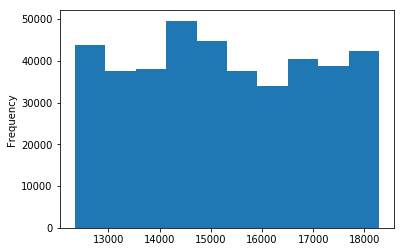

In [53]:
retail['CustomerID'].plot(kind='hist')

In [63]:
for column in retail.columns:
    print(column,retail[column].notnull().sum())

InvoiceNo 541909
StockCode 541909
Description 540455
Quantity 541909
InvoiceDate 541909
UnitPrice 541909
CustomerID 406829
Country 541909


In [55]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [56]:
for column in retail.columns:
        print(column,retail[column].isnull().sum())

InvoiceNo 0
StockCode 0
Description 1454
Quantity 0
InvoiceDate 0
UnitPrice 0
CustomerID 135080
Country 0


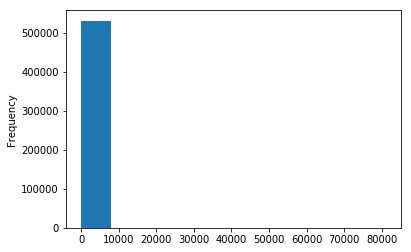

In [79]:
retail_sorted_nonegative['Quantity'].plot('hist')